<a href="https://colab.research.google.com/github/rjromo/RNN/blob/master/Generar_Texto_RNN_FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *
from fastai.text import *

from fastai.collab import *
from fastai.tabular import *


#%load_ext autoreload
#%autoreload 2

In [3]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas')]

In [4]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/pos'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg')]

ESTE DATA SET CONTIENE

    25,000 reviews en trainning
    25,000 interviews en validación
    50,000 reviews no supervisados de películas (no clasificados)


In [0]:
bs=48  #tamaño del batch

In [0]:
data_lm = (TextList.from_folder(path)
           #Inputs: todas los archivos de texto
            .filter_by_folder(include=['train', 'test']) 
           #Solo mantenemos los archivos que están en las carpetas de entrenamiento y prueba
             .split_by_rand_pct(0.1)  
           #separamos el 10% de los datos para validación
            .label_for_lm()           
           #Etiquetamos correctamente paara crear nuestro modelo de lenguaje
            .databunch(bs=bs))


In [0]:
data_lm.save('tmp_lm.pkl')

In [0]:
data_lm = load_data(path,'tmp_lm.pkl', bs=bs)

In [11]:
data_lm.show_batch()

idx,text
0,"xxmaj david and xxmaj bathsheba ' is an emotional movie full of vividly memorable characters who attain mythic status while retaining their humanity ... xxmaj henry xxmaj king handles the powerful story , taken from the xxmaj old xxmaj testament , with skill ... \n \n xxmaj david , ' the lion of xxmaj judah , ' having stormed the walls of xxmaj xxunk , saves the life of"
1,"billy is a strong minded and brave person who all of us can relate to . xxmaj it is easy to empathize with him as we silently cheer for him to reach his goal , even though we might not always agree with what he 's doing or the choices he makes . \n \n xxmaj the children in the film are portrayed exactly how children are in real"
2,"fore and very good characterisation making some only too believable ! \n \n xxmaj scary with some gore this is well worth a viewing . xxbos xxmaj the story is somewhat stilted , what with the main character 's sudden reversals of fortune , but xxmaj leslie xxmaj howard and xxmaj bette xxmaj davis 's portrayals of xxmaj philip xxmaj carey , the naïve obsessed lover and xxmaj mildred"
3,"'s xxmaj hood of the xxmaj living xxmaj dead , adopts the recent popularity of horror movies for the hip - hop audience . xxmaj ricky ( xxmaj carl xxmaj washington ) is a young scientist in xxmaj oakland trying to keep his younger brother xxmaj jermaine ( xxmaj brandon xxmaj daniels ) out of trouble after the death of their parents . xxmaj after xxmaj jermaine is shot by"
4,"commented on how stupid it was . xxmaj well that was because it is n't supposed to be taken so seriously , basically it is a a movie that mocks horror flicks and does a damn good job .. xxmaj there seems to be another movie coming out like that too , umm ... xxmaj scary xxmaj movie ? ? xxmaj well this is xxmaj aussie , and original !"


In [0]:
learn = language_model_learner(data_lm,AWD_LSTM, drop_mult=0.3)

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


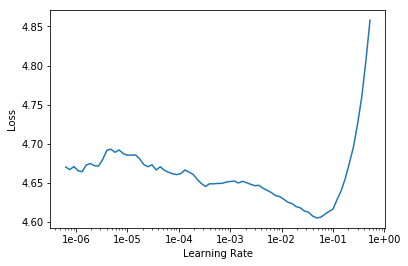

In [14]:
learn.recorder.plot(skip_end=15)

In [15]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.130999,3.998920,0.294834,20:11


In [16]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.847468,3.838252,0.311877,23:23


KeyboardInterrupt: ignored

In [19]:
learn.predict('This movie was amazing because ', 100, temperature=1.1, min_p=0.001)

'This movie was amazing because  one man has a copy of it . That the director have made the whole thing in a sense . The guy who named is played by Paul Reiser , a character actor who , in order to make this movie the greatest he have ever pulled , said " ... like you \'ll come on back on Showtime ! " \n \n  The movie centers on Peter Falk ( Falk ) an Irish gay man , at the time a big Peter Falk fan ( " The'